In [ ]:
#インポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score



# ファイルパスを指定
train_file = 'train.csv'
test_file  = 'test.csv'

# データの読み込み
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

# カラム名を変更
column_mapping = {
    'id'                      : 'ID',                 # インデックスとして使用
    'Age'                     : 'Age',                # 年齢
    'BusinessTravel'          : 'BT',                 # 出張 (1=出張なし, 2=頻繁に出張, 3=たまに出張)
    'DailyRate'               : 'DR',                 # 給与レベル
    'Department'              : 'Dept',               # 部署 (1=人事, 2=研究開発, 3=営業)
    'DistanceFromHome'        : 'DistHome',           # 通勤距離
    'Education'               : 'Edu',                # 学歴 (1=高校以下, 2=大学, 3=学士, 4=修士, 5=博士)
    'EducationField'          : 'EduField',           # 専攻 (1=人事, 2=生命科学, 3=マーケティング, 4=医療科学, 5=その他, 6=技術)
    'EnvironmentSatisfaction' : 'EnvSat',             # 環境満足度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    'Gender'                  : 'Gender',             # 性別 (1=女性, 2=男性)
    'HourlyRate'              : 'HR',                 # 時給
    'JobInvolvement'          : 'JobInv',             # 仕事熱心度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    'JobLevel'                : 'JobLvl',             # 職位
    'JobRole'                 : 'JobRole',            # 職種
    'JobSatisfaction'         : 'JobSat',             # 職務満足度 (1=低い, 2=中程度, 3=高い, 4=非常に高い)
    'MaritalStatus'           : 'MarStat',            # 結婚状況 (1=離婚, 2=既婚, 3=未婚)
    'MonthlyIncome'           : 'MonthlyInc',         # 月給
    'NumCompaniesWorked'      : 'NumComp',            # 勤務会社数
    'Over18'                  : 'Over18',             # 18歳以上 (1=はい, 2=いいえ)
    'OverTime'                : 'OT',                 # 残業 (1=なし, 2=あり)
    'PercentSalaryHike'       : 'PerSalHike',         # 給与増加率
    'PerformanceRating'       : 'PerfRating',         # 業績評価
    'RelationshipSatisfaction': 'RelSat',             # 人間関係満足度
    'StandardHours'           : 'StdHours',           # 標準労働時間
    'StockOptionLevel'        : 'StockOptLvl',        # ストックオプションレベル
    'TotalWorkingYears'       : 'TotalWorkYrs',       # 総勤務年数
    'TrainingTimesLastYear'   : 'TrainTimesLastYr',   # 昨年の訓練回数
    'WorkLifeBalance'         : 'WLB',                # ワークライフバランス
    'YearsAtCompany'          : 'YrsAtCompany',       # 勤続年数
    'YearsInCurrentRole'      : 'YrsInCurrRole',      # 現職の年数
    'YearsSinceLastPromotion' : 'LastPromo',          # 最終昇進からの年数
    'YearsWithCurrManager'    : 'WithCurrMgr',        # 現マネージャーとの年数
    'Attrition'               : 'Attrition'           # 離職 (0=なし, 1=あり)
}


train_df.rename(columns=column_mapping, inplace=True)
test_df.rename(columns=column_mapping, inplace=True)

# カテゴリーマッピング
business_travel_map = {'Non-Travel': 1, 'Travel_Frequently': 2, 'Travel_Rarely': 3}
department_map      = {'Human Resources': 1, 'Research & Development': 2, 'Sales': 3}
gender_map          = {'Female': 1, 'Male': 2}
MarStat_map         = { 'Divorced': 1, 'Married': 2, 'Single': 3}
Over18_map          = {'Y': 1, 'N': 2}
OT_map              = {'No': 1, 'Yes': 2}

# int型に変換
train_df['BT']      = train_df['BT'].map(business_travel_map).astype(int)
train_df['Dept']    = train_df['Dept'].map(department_map)   .astype(int)
train_df['Gender']  = train_df['Gender'].map(gender_map)     .astype(int)
train_df['MarStat'] = train_df['MarStat'].map(MarStat_map)   .astype(int)
train_df['Over18']  = train_df['Over18'].map(Over18_map)     .astype(int)
train_df['OT']      = train_df['OT'].map(OT_map)             .astype(int)
train_df['Attrition'] = train_df['Attrition'].astype(int)

test_df['BT']       = test_df['BT'].map(business_travel_map) .astype(int)
test_df['Dept']     = test_df['Dept'].map(department_map)    .astype(int)
test_df['Gender']   = test_df['Gender'].map(gender_map)      .astype(int)
test_df['MarStat']  = test_df['MarStat'].map(MarStat_map)    .astype(int)
test_df['Over18']   = test_df['Over18'].map(Over18_map)      .astype(int)
test_df['OT']       = test_df['OT'].map(OT_map)              .astype(int)

# 変換後のデータを確認
# 全ての列が表示されるように設定する
pd.set_option('display.max_columns', None)  # 全ての列を表示
pd.set_option('display.max_rows', None)     # 全ての行を表示
print("Train Dataset:")
display(train_df.head())
print("\nTest Dataset:")
display(test_df.head())
train_df.describe()
test_df.describe()

Train Dataset:


,ID,Age,BT,DR,Dept,DistHome,Edu,EduField,EnvSat,Gender,HR,JobInv,JobLvl,JobRole,JobSat,MarStat,MonthlyInc,NumComp,Over18,OT,PerSalHike,PerfRating,RelSat,StdHours,StockOptLvl,TotalWorkYrs,TrainTimesLastYr,WLB,YrsAtCompany,YrsInCurrRole,LastPromo,WithCurrMgr,Attrition
0,0,26,3,450.941476,2,7.601074,3,Medical,4,2,43,2,1,Laboratory Technician,2,3,16307,1,1,1,13,3,3,80,0,1,3,2,11,8,7,0,0
1,3,47,3,730.235896,2,26.739489,3,Technical Degree,2,2,98,2,1,Research Scientist,1,1,9526,8,1,2,11,3,3,80,1,20,1,1,5,9,4,4,0
2,7,26,3,1082.560066,1,7.374739,3,Life Sciences,2,2,84,2,1,Human Resources,2,2,10596,8,1,1,18,3,2,80,1,4,3,3,3,2,0,2,0
3,10,46,3,706.247579,2,14.791373,1,Medical,1,1,79,2,1,Laboratory Technician,3,1,5762,0,1,2,20,4,4,80,1,6,0,1,5,4,7,7,1
4,11,25,3,500.610860,2,2.146966,4,Medical,2,2,98,3,2,Manufacturing Director,3,1,17068,6,1,2,14,3,2,80,1,8,3,3,1,0,0,0,0



Test Dataset:


,ID,Age,BT,DR,Dept,DistHome,Edu,EduField,EnvSat,Gender,HR,JobInv,JobLvl,JobRole,JobSat,MarStat,MonthlyInc,NumComp,Over18,OT,PerSalHike,PerfRating,RelSat,StdHours,StockOptLvl,TotalWorkYrs,TrainTimesLastYr,WLB,YrsAtCompany,YrsInCurrRole,LastPromo,WithCurrMgr
0,1,34,2,358.039056,2,9.926847,3,Life Sciences,1,1,73,3,1,Research Scientist,4,1,5677,0,1,1,11,3,3,80,1,11,2,3,7,7,2,7
1,2,37,3,749.376719,2,10.391959,3,Medical,1,2,78,3,1,Laboratory Technician,1,2,4107,1,1,1,13,3,4,80,0,5,3,2,1,3,1,0
2,4,34,2,958.484177,2,3.297025,3,Life Sciences,2,1,73,3,3,Research Director,4,1,9907,7,1,1,16,3,3,80,1,21,2,2,4,3,1,4
3,5,34,3,79.174592,2,2.430032,4,Medical,3,1,53,3,5,Manager,3,3,9907,0,1,1,13,3,4,80,3,9,3,3,20,6,1,4
4,6,29,3,943.191218,2,10.017149,2,Life Sciences,3,2,77,3,2,Research Director,2,1,1611,4,1,1,12,3,3,80,1,25,2,4,1,7,0,0


,ID,Age,BT,DR,Dept,DistHome,Edu,EnvSat,Gender,HR,JobInv,JobLvl,JobSat,MarStat,MonthlyInc,NumComp,Over18,OT,PerSalHike,PerfRating,RelSat,StdHours,StockOptLvl,TotalWorkYrs,TrainTimesLastYr,WLB,YrsAtCompany,YrsInCurrRole,LastPromo,WithCurrMgr
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,979.136250,33.22750,2.568750,714.512398,2.286250,9.834908,2.832500,2.713750,1.590000,67.69375,2.733750,2.06750,2.732500,2.107500,7035.415000,2.700000,1.0,1.268750,15.393750,3.140000,2.717500,80.0,0.876250,10.530000,2.836250,2.696250,6.090000,3.911250,2.060000,3.705000
std,579.901688,8.15806,0.693451,418.682914,0.507082,8.146464,1.092445,1.127342,0.492141,20.33856,0.678923,1.13338,1.095419,0.720481,5093.122788,2.528931,0.0,0.443587,3.716985,0.347204,1.033939,0.0,0.881423,7.661428,1.254553,0.685254,4.858643,3.524401,3.218983,3.350299
min,1.000000,17.00000,1.000000,59.071522,1.000000,0.140883,1.000000,1.000000,1.000000,30.00000,1.000000,1.00000,1.000000,1.000000,1563.000000,0.000000,1.0,1.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,482.750000,26.00000,2.000000,375.148459,2.000000,2.667125,2.000000,2.000000,1.000000,48.75000,2.000000,1.00000,2.000000,2.000000,3339.000000,1.000000,1.0,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
50%,981.500000,34.00000,3.000000,706.465120,2.000000,8.444392,3.000000,3.000000,2.000000,70.50000,3.000000,2.00000,3.000000,2.000000,4938.500000,1.000000,1.0,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,2.000000
75%,1468.000000,37.00000,3.000000,1040.241914,3.000000,14.080546,4.000000,4.000000,2.000000,85.00000,3.000000,3.00000,4.000000,3.000000,8268.000000,4.000000,1.0,2.000000,18.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,1999.000000,58.00000,3.000000,1483.430375,3.000000,30.041884,5.000000,4.000000,2.000000,100.00000,4.000000,5.00000,4.000000,3.000000,19973.000000,9.000000,1.0,2.000000,25.000000,4.000000,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,31.000000,16.000000,15.000000,17.000000


In [ ]:
# JobRole列を削除
train_df = train_df.drop(['JobRole'], axis=1)
test_df = test_df.drop(['JobRole'], axis=1)

'''
# JobRole ごとの Attrition == 1 の割合を計算
jobrole_attrition_rate = train_df.groupby('JobRole')['Attrition'].mean().reset_index()
jobrole_attrition_rate.columns = ['JobRole', 'Attrition_Rate']

# 元のデータフレームにマッピング
train_df = train_df.merge(jobrole_attrition_rate, on='JobRole', how='left')
test_df = test_df.merge(jobrole_attrition_rate, on='JobRole', how='left')

# マッピングした割合を JobLvl 列の値で割る
train_df['EncJobRole'] = train_df['Attrition_Rate'] / train_df['JobLvl']
test_df['EncJobRole'] = test_df['Attrition_Rate'] / test_df['JobLvl']

# 元のJobRole列を削除
train_df = train_df.drop(['JobRole','Attrition_Rate'], axis=1)
test_df = test_df.drop(['JobRole','Attrition_Rate'], axis=1)


# 結果を表示
print(train_df[['EncJobRole', 'JobLvl']])
'''

# ワンホットエンコーディングを適用
train_df = pd.get_dummies(train_df, columns=['EduField'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['EduField'], drop_first=True)

# train_dfとtest_dfで同じ列が揃うように調整
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.columns]
'''
# 新しい列の追加(JobRoleを含む)
train_df['New'] = train_df['MonthlyInc'] * train_df['StockOptLvl']
test_df['New'] = test_df['MonthlyInc'] * test_df['StockOptLvl']
'''

"\n# 新しい列の追加(JobRoleを含む)\ntrain_df['New'] = train_df['MonthlyInc'] * train_df['StockOptLvl']\ntest_df['New'] = test_df['MonthlyInc'] * test_df['StockOptLvl']\n"

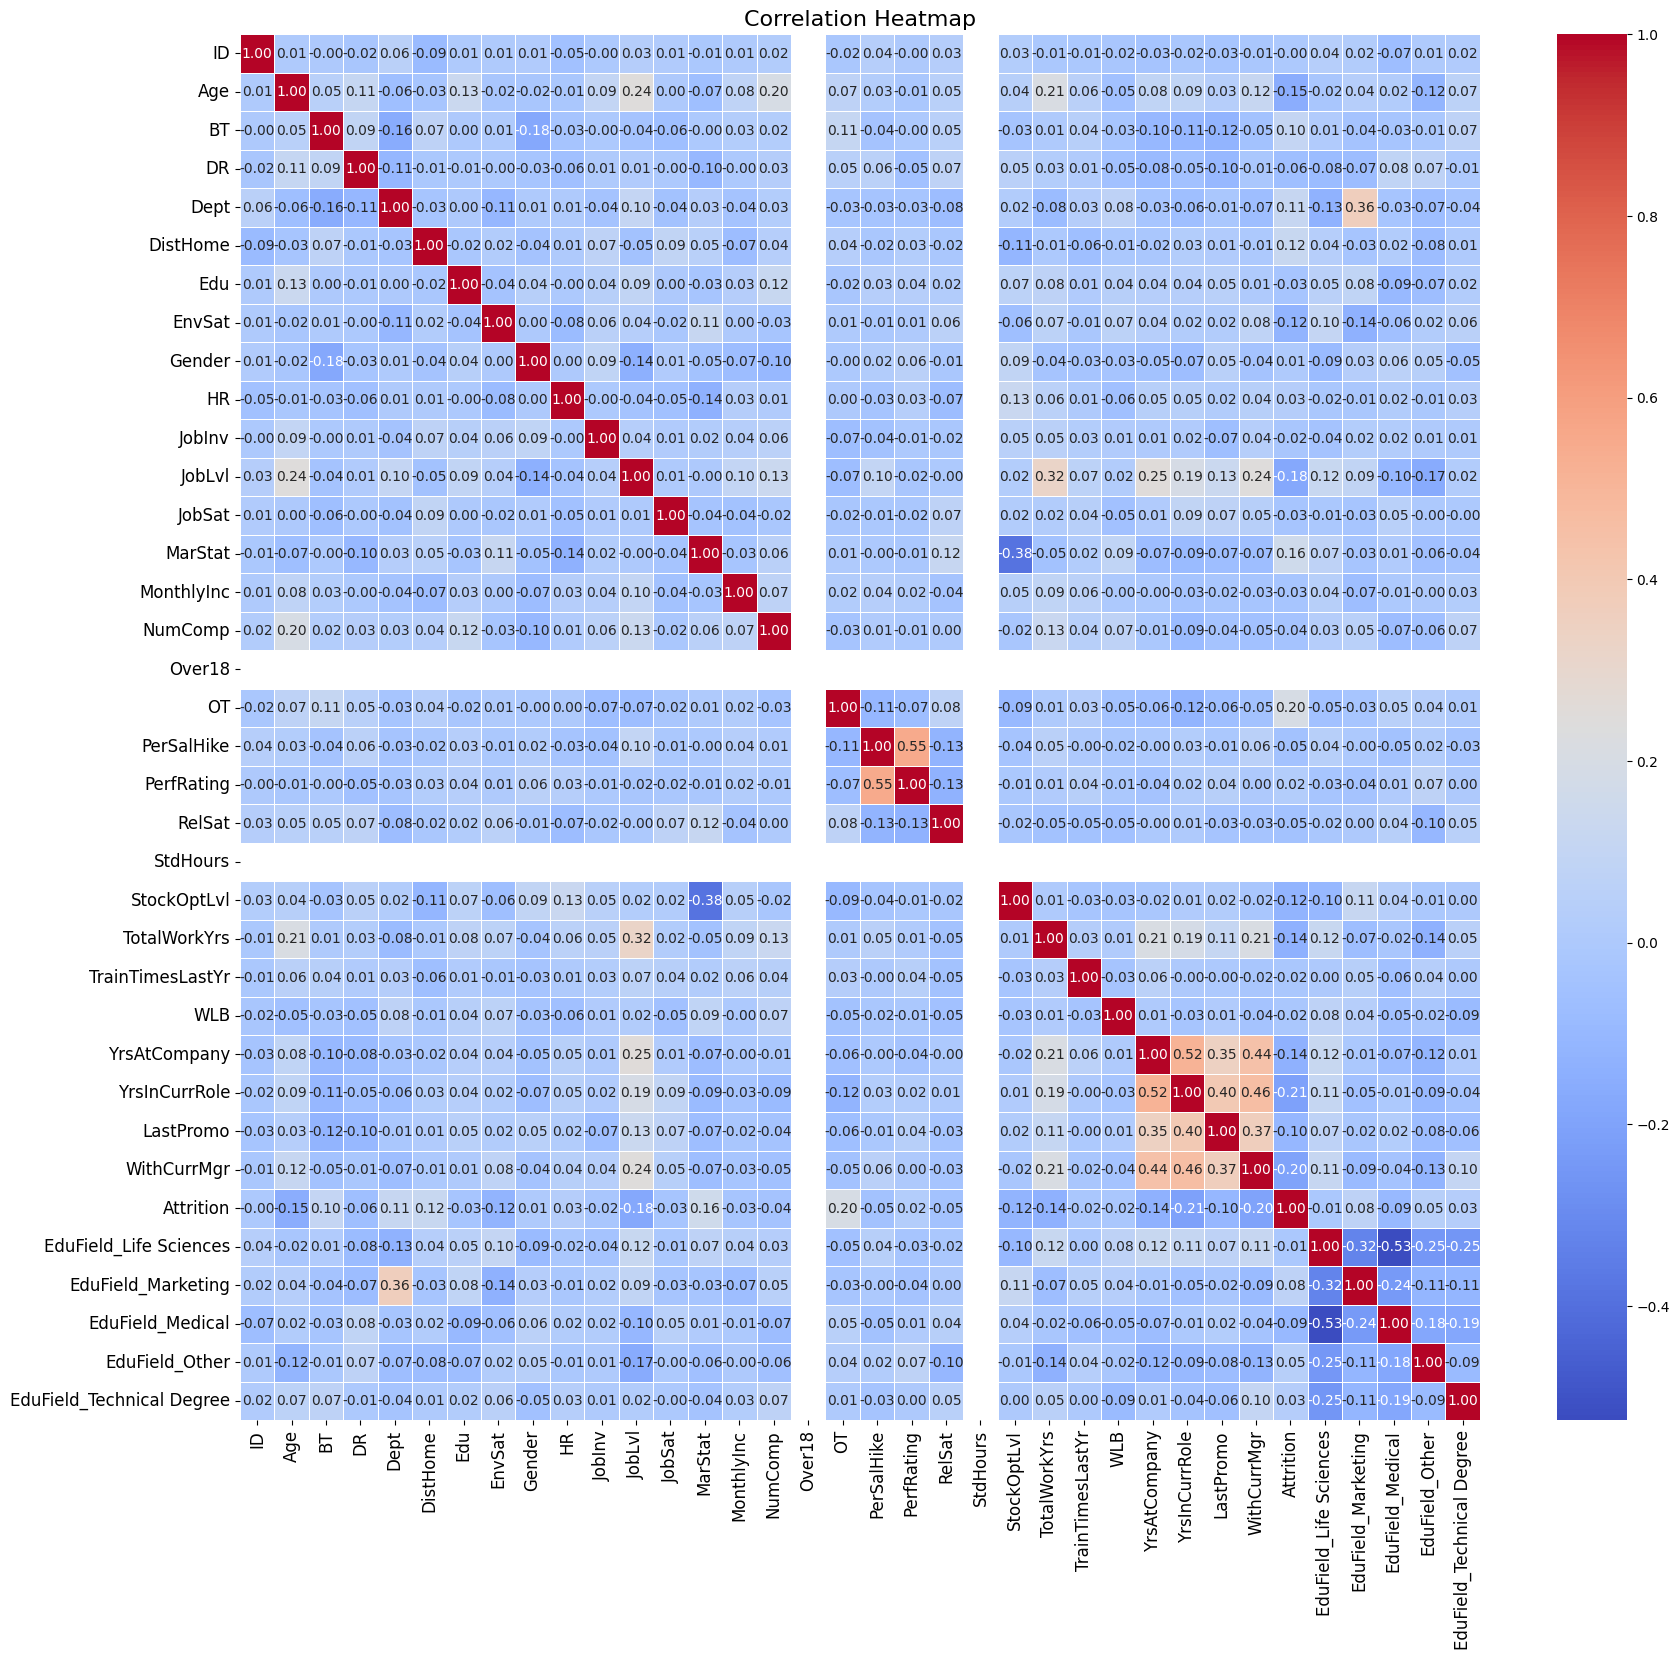

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Attrition = 1 の個数: 213
Attrition = 0 の個数: 987
Attrition = 1 と Attrition = 0 の比率: 0.22


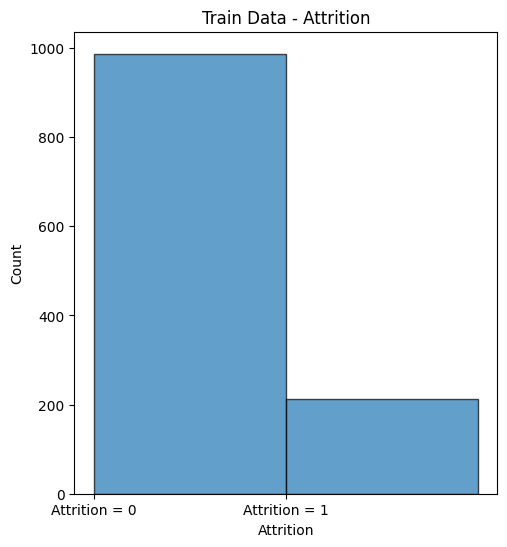

In [ ]:
# 相関行列を計算
corr_matrix = train_df.corr()

# ヒートマップを作成
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# データの偏りの確認
print(train_df[train_df['Over18'] == 2]['Over18'].value_counts().sort_values())
print(test_df[test_df['Over18'] == 2]['Over18'].value_counts().sort_values())
print(train_df[train_df['StdHours'] != 80]['StdHours'].value_counts().sort_values())
print(test_df[test_df['StdHours'] != 80]['StdHours'].value_counts().sort_values())

# train_df の Attrition 列のヒストグラム
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train_df['Attrition'], bins=[0, 1, 2], edgecolor='black', alpha=0.7)
plt.title('Train Data - Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0, 1], ['Attrition = 0', 'Attrition = 1'])

import pandas as pd

# Attrition = 1 と Attrition = 0 の個数をカウント
count_attrition_1 = (train_df['Attrition'] == 1).sum()
count_attrition_0 = (train_df['Attrition'] == 0).sum()

# 比率を計算
ratio_attrition_1_to_0 = count_attrition_1 / count_attrition_0

# 結果を表示
print(f'Attrition = 1 の個数: {count_attrition_1}')
print(f'Attrition = 0 の個数: {count_attrition_0}')
print(f'Attrition = 1 と Attrition = 0 の比率: {ratio_attrition_1_to_0:.2f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 179, number of negative: 781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186458 -> initscore=-1.473189
[LightGBM] [Info] Start training from score -1.473189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

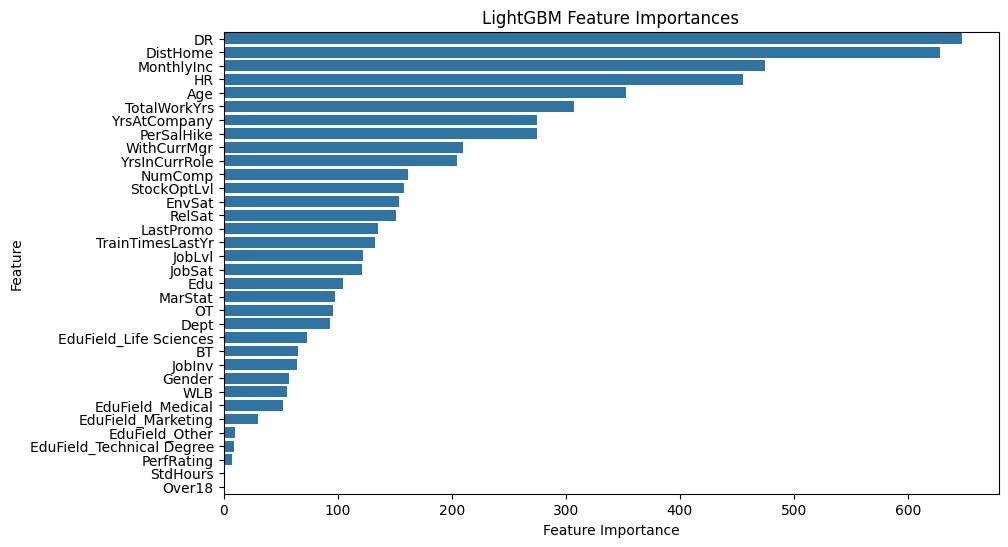

   ID  Attrition
0   1          0
1   2          0
2   4          0
3   5          0
4   6          0
LightGBM Submission file created successfully.


In [ ]:

# 訓練データとテストデータの分割
X = train_df.drop(['ID', 'Attrition'], axis=1) # JobRole列を除外
y = train_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# ランダムフォレストモデルの初期化と設定
model_rf = RandomForestClassifier(
    random_state=41,       # 乱数シード

    n_estimators=100,  # 使用する決定木の数
    # 選択肢: [100, 200, 300, 400, 500]

    max_features='auto',  # 各決定木の分岐で使用する特徴量の数
    # 選択肢: ['auto', 'sqrt', 'log2']

    max_depth=None,  # 決定木の最大深さ
    # 選択肢: [None, 10, 20, 30, 40, 50]

    min_samples_split=2,  # 内部分割を行うための最小サンプル数
    # 選択肢: [2, 5, 10]

    min_samples_leaf=1,  # 葉ノードに必要な最小サンプル数
    # 選択肢: [1, 2, 4]

    bootstrap=True,  # ブートストラップサンプリングの使用
    # 選択肢: [True, False]
)

# ランダムフォレストモデルの訓練
model_rf.fit(X_train, y_train)

# モデルの評価
train_accuracy_rf = model_rf.score(X_train, y_train)
test_accuracy_rf = model_rf.score(X_test, y_test)

print(f"Random Forest Train Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")

# モデルの特徴量の重要度を取得する
feature_importances_rf = model_rf.feature_importances_

# 特徴量の重要度を降順に並べ替える
feature_importances = pd.Series(feature_importances_rf, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# プロットする
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# テストデータでの予測
X_final_test_rf = test_df.drop(['ID', 'Attrition'], axis=1)  # 'JobRole'以外の特徴量を取得
y_final_pred_rf = model_rf.predict(X_final_test_rf)

# 予測結果のデータフレームの作成
df_predictions_rf = pd.DataFrame({
    'ID': test_df['ID'],
    'Attrition': y_final_pred_rf
})

# 予測結果のデータフレームの表示
print(df_predictions_rf.head())

# 提出ファイルの保存
df_predictions_rf.to_csv('submission_rf.csv', index=False, header=False)
print("Random Forest Submission file created successfully.")

#暫定評価 0.8812500


























import lightgbm as lgb
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 訓練データとテストデータの分割
X = train_df.drop(['ID', 'Attrition'], axis=1) # 'JobRole'列を除外
y = train_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

model_lgb = lgb.LGBMClassifier(
    objective='binary',                # バイナリ分類の目的（例: 'binary', 'multiclass', 'regression'）
    metric='binary_logloss',           # バイナリ対数損失を評価指標として使用（例: 'binary_logloss', 'auc'）
    boosting_type='gbdt',              # 勾配ブースティング決定木を使用（例: 'gbdt', 'dart', 'goss'）
    num_leaves=62,
    # ツリーの葉の数（デフォルト: 31、過剰な葉はオーバーフィッティングの原因に）
    subsample_freq=5,
    # サブサンプリングの頻度（デフォルト: 1、1はすべてのツリーでサブサンプリングを行う）
    subsample=0.8,
    # サブサンプリング比率（デフォルト: 1.0、0.8はサンプルの80%を使用）
    learning_rate=0.2,
    # 学習率（デフォルト: 0.1、学習率が高いほど学習が速いが、過学習のリスクも）
    colsample_bytree=0.8,
    # 各ツリーごとの特徴量サブサンプリング比率（デフォルト: 1.0、0.9は特徴量の90%を使用）
    max_depth=-1,
    # ツリーの最大深さ（デフォルト: -1、-1は制限なし）
    n_estimators=200,
    # 決定木の数（デフォルト: 100、200はより多くの木を使用）
    random_state=41
    # 再現性のためのランダムシード（デフォルト: None）
)


# LightGBMモデルの訓練
model_lgb.fit(X_train, y_train)

# モデルの評価
train_accuracy_lgb = model_lgb.score(X_train, y_train)
test_accuracy_lgb = model_lgb.score(X_test, y_test)

print(f"LightGBM Train Accuracy: {train_accuracy_lgb:.4f}")
print(f"LightGBM Test Accuracy: {test_accuracy_lgb:.4f}")

# モデルの特徴量の重要度を取得する
feature_importances_lgb = model_lgb.feature_importances_

# 特徴量の重要度を降順に並べ替える
feature_importances = pd.Series(feature_importances_lgb, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# プロットする
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('LightGBM Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# テストデータでの予測
X_final_test_lgb = test_df.drop(['ID', 'Attrition'], axis=1)  # 'JobRole'以外の特徴量を取得
y_final_pred_lgb = model_lgb.predict(X_final_test_lgb)

# 予測結果のデータフレームの作成
df_predictions_lgb = pd.DataFrame({
    'ID': test_df['ID'],
    'Attrition': y_final_pred_lgb
})

# 予測結果のデータフレームの表示
print(df_predictions_lgb.head())

# 提出ファイルの保存
df_predictions_lgb.to_csv('submission_lgb.csv', index=False, header=False)
print("LightGBM Submission file created successfully.")